# Polynomial Translation


Given an $n^{th}$ degree polynomial, $p$, it's translation by a horizontal offset, $h \neq 0$, can be expressed as a new $n^{th}$ degree polynomial $q$, 

\begin{equation}  \notag 
p(x + h) = q(x),
\end{equation}

where, 

\begin{equation}  \notag 
	p(x) = \sum_{i=0}^{n} a_i x^i, 
\end{equation}


\begin{equation}  \notag 
	q(x) = \sum_{i=0}^{n} b_i x^i,
\end{equation}


\begin{equation}  \notag 
	b_i =  \sum_{j=i}^{n} {j \choose i} (-h)^{j-i} a_j 
\end{equation}


## This comes directly from the binomial theorem
Expanding $p(x + h)$ using binomial theorem and reversing summation indices,

\begin{equation}  \notag 
	p(x + h) = \sum_{i=0}^{n} a_i (x + h)^i = \sum_{i=0}^{n}  \sum_{j=0}^{i} a_i  x^j{i \choose j} h^{i-j} =  \sum_{i=0}^{n} x^i  \sum_{j=i}^{n} {j \choose i} h^{j-i} a_j 
\end{equation}


## Represented as a system...
Using an $(n+1) \times (n+1)$ matrix, $D_h$, for $q$'s representation,


\begin{equation} \notag
 \vec{p} =
    \begin{pmatrix}
          a_0 \\
          a_1 \\
          \vdots \\
          a_{n} \\
    \end{pmatrix} \, , \quad
\vec{q} = 
\begin{pmatrix}
      b_0 	 	\\
      b_1 		 \\
      \vdots 	 	\\
      b_n   \\
\end{pmatrix} \, , \quad
D_h = 
\left(\begin{array}{cccc}
d_{00} & d_{01} & \ldots & d_{0n} \\
0 & d_{11} & \ldots & d_{1n} \\
\vdots & \vdots & d_{ij} & \vdots \\
0 & 0 & \ldots & d_{nn}
\end{array}\right), \quad d_{ij} = {j \choose i} (-h)^{j-i}
\end{equation}

defining ${j \choose i}$ as,

\begin{equation}\notag
{j \choose i} = 
\begin{cases}
    \frac{j!}{(j-i)!i!},& \text{if } j \geq i \geq 0\\
    0,              & \text{otherwise}
\end{cases}
\end{equation}

Then the coefficients for the translated polynomial $p(x + h)$ or $r(x)$ can be found by solving the following system (as demonstrated bellow in code),

\begin{equation}  \tag{2} 
D_h \vec{p} = \vec{q} 
\end{equation}

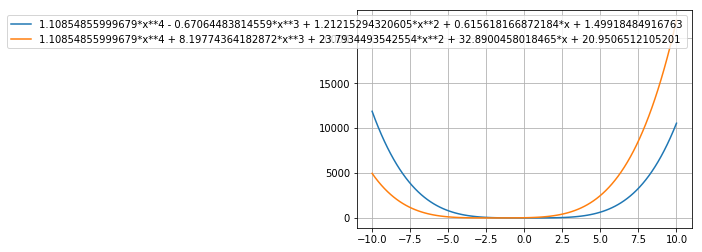

In [2]:
import random

import numpy as np
from numpy.polynomial.polynomial import polyval
from numpy.linalg import matrix_power
from numpy.linalg import matrix_rank

from scipy.linalg import lu
from scipy.linalg import pascal

import matplotlib.pyplot as plt

import sympy
import sympy as sp
from sympy.abc import x

from IPython.display import display, Math, Latex

#
# Display Numpy Poly1d's
#

def plot_polys(polys, a=-10, b=10, steps=100):
    sp.init_printing()
    from sympy.abc import x
    X = np.linspace(a,b,steps)

    for p in polys:
        y = p(X)
        l = sp.Poly(p.c,x).as_expr()
        plt.plot(X,y, label=l)
    
    plt.grid()
    plt.legend()
    plt.show()
    

#
# create Horizontal Shift Matrix
#

def poly_shift_matrix(order, h):
    # h -- horizontal shift amount
    
    # n+1 coeficients to solve for -- n+1 x n+1 shift matrix
    n = order + 1
    
    # pascal matrix
    P = pascal(n, kind='upper')
    
    # create H
    H = np.eye(n)
    _h = 1
    for k in range(n):
        for i in range(n-k):            
            H[i,i+k] = _h
        _h *= h

    # create shift matrix - flip for numpy convention
    S = np.flip(H * P)
    
    # return
    return S

#
# Horizontal Shift
#

def poly_horizontal_translation(p, delta_x):
    
    # r(x) = p(x + delta_x)
    S = poly_shift_matrix(p.order,delta_x)
    r = np.poly1d( S @ p )
    
    # return r(x) -- numpy polynomial
    return r

#
# Vertical Shift
#

def poly_vertical_translation(poly, delta_y):
    # r(x) = p(x) + delta_y
    r = poly + delta_y
    return r 


#
# Translate Numpy Polynomial
#

def translate_polynomial(p, delta_x=0, delta_y=0):
    r = p
    
    if delta_x != 0:
        # r(x) = p(x + delta_x)
        r = poly_horizontal_translation(r, delta_x)
        
    if delta_y != 0:
        # r(x) = p(x) + delta_y
        r = poly_vertical_translation(r, delta_y)
        
    return r

#
# Random Testing
#

# SETTINGS
MIN_DEGREE = 2
MAX_DEGREE = 5
SHIFT_RANGE = 2 # MAX

# generate random base polynomial
n = random.randint(MIN_DEGREE,MAX_DEGREE)
p = np.poly1d( np.random.randn(n))

# translate base polynomial
x_shift, y_shift = random.randint(-SHIFT_RANGE,SHIFT_RANGE), random.randint(-SHIFT_RANGE,SHIFT_RANGE)
q = translate_polynomial(p, delta_x=x_shift, delta_y=y_shift)

# plot results
plot_polys([p, q], a=-10, b=10)



# Interpolation of recursivley defined sequences

One interseting use case of the translation Matrix, $D_h$, defined above involves finding an interpolating polynomial for a seqence, $S$, defined recursivley using a generating polynomial, $g$, of finite degree $n$ and a known $(x_0,y_0) $ pair as follows,

With $(x_0, y_0)$ and $h$ and $g(x)$ given, the recusrsive formula defines an infinite set $S$,

\begin{equation}\notag
S = \{(x_i, y_i)\}_{i=-\infty}^{\infty}
\end{equation}

\begin{cases}
    x_{i+1} = x_i + h, \\
    y_{i+1} = y_i + g(x_{i+1})
\end{cases}




## Theorem: There exists a unique finite degree polynomial interpolant, $p$, of the infinite set $S$ generated by the recursive formula above. If the generator polynomial $g \in \mathbb{P}_n$ then the interpolant $P$ is of degree $n+1$.

\begin{equation} 
	p(x_i) = y_i, \quad for \quad \forall \, x_i,y_i \in S
\end{equation}

If the following two conditions are met, then $p$ interpolates $S$,

\begin{equation}  \tag{condition 1}
	p(x_0) = y_0
\end{equation}

\begin{equation}  \tag{condition 2}
	p(x_i + h) = p(x) + g(x_i + h), \quad \, \forall x_i, y_i \in S
\end{equation}

\begin{equation}
	h \neq 0
\end{equation}




## Existance

\begin{equation}  \tag{2}
	p(x_i + h) = p(x_i) + g(x_i + h)
\end{equation}

Using vector representations of $p, g,$ and $x$ and an $n+1 \times n+1$ matrix, $D_h$, for $p(x + h)$'s representation,

\begin{equation} \notag
\vec{p} = 
\begin{pmatrix}
      a_0 	 	\\
      a_1 		 \\
      \vdots 	 	\\
      a_{n}   \\
\end{pmatrix}, \,
\vec{g} = 
\begin{pmatrix}
      b_0 	 	\\
      b_1 		 \\
      \vdots 	 	\\
      b_n   \\
\end{pmatrix},\,
\vec{x}^{\,T} = 
\begin{pmatrix}
      x^0 	 	\\
      x^1 		 \\
      \vdots 	 	\\
      x^n   \\
\end{pmatrix}
\end{equation}

\begin{equation}  \notag
D_h = 
\left(\begin{array}{cccc}
d_{00} & d_{01} & \ldots & d_{0n} \\
0 & d_{11} & \ldots & d_{1n} \\
\vdots & \vdots & d_{ij} & \vdots \\
0 & 0 & \ldots & d_{nn}
\end{array}\right), d_{ij} = {j \choose i} (-h)^{j-i}
\end{equation}

Then equation $(2)$ can be represented,

\begin{equation}  \tag{2.2} 
\vec{x} D_h \vec{p} = \vec{x} \vec{p} + \vec{x} D_h \vec{g} 
\end{equation}



Rearranging equation $(2.2)$,

\begin{equation}  \notag
D_h^{-1} ( D_h - I ) \vec{p} = \vec{g} 
\end{equation}

The properties of $d_{ij}$ make the diagonal elements of $D_h$ all equal to one,
\begin{equation} \notag 
	d_{ij} = {j \choose i} (-h)^{j-i} = 1 \, if \, j = i
\end{equation}
When the identity matrix is subtracted from $D_h$, the matrix remains upper triangular but with zero elements along its diagonal,

Let,

\begin{equation}  \notag 
	A = D_h - I
\end{equation}

\begin{equation}  \notag
A = 
\left(\begin{array}{cccc}
0 & d_{01} & \ldots & d_{0n} \\
0 & 0 & \ldots & d_{1n} \\
\vdots & \vdots & 0 & \vdots \\
0 & 0 & \ldots & 0
\end{array}\right)
\end{equation}

This leads to an inconsistent system for equation $(2.2)$ if $\vec{g}$ has a non zero number as its final entry. Therefore if $p \in \mathbb{P}_n$ then $g \in \mathbb{P}_{n-1}$ for a solution to exist. 

\begin{equation}  \tag{2.2}
\left(\begin{array}{cccc}
0 & d_{01} & \ldots & d_{0n} \\
0 & 0 & \ldots & d_{1n} \\
\vdots & \vdots & 0 & \vdots \\
0 & 0 & \ldots & 0
\end{array}\right)
\begin{pmatrix}
      a_0 	 	\\
      a_1 		 \\
      \vdots 	 	\\
      a_{n}   \\
\end{pmatrix}
= 
\begin{pmatrix}
      b_0 	 	\\
      b_1 		 \\
      \vdots 	 	\\
      0   \\
\end{pmatrix}
\end{equation}

Additionally, due to the other properties of $d_{ij}$, if $h \neq 0$, then every element of $A$ above its main diagonal will  $\neq 0$, leading to a pivot column in all other rows.  Additionally, $ g(x +h) $ can be written as another polynomial of the same degree so $ D_h^{-1} $ can temporarily be ignored.

We now have a system of $n$ equations that can be used to solve for the $n$ unknowns $ a_1, a_2, \ldots, a_n$.  


\begin{equation}  \tag{2.3}
\left(\begin{array}{cccc}
d_{01} & \ldots & d_{0n-1} \\
0 & d_{12} \ldots & d_{1n-1} \\
 \vdots &  & \vdots \\
0 & \ldots & d_{{n-1} {n-1}}
\end{array}\right)
\begin{pmatrix}
      a_1 		 \\
      a_2 		 \\
      \vdots 	 	\\
      a_{n}   \\
\end{pmatrix}
= 
\begin{pmatrix}
      b_1 		 \\
      b_2 		 \\
      \vdots 	 	\\
      b_n   \\
\end{pmatrix}
\end{equation}

Therefore,

\begin{equation}  \tag{existance}
	\forall g \in \mathbb{P}_{n-1}, \exists p \in \mathbb{P}_n \, | \, p(x + h) = p(x) + g(x +h)
\end{equation}

## Uniqueness

For any generating polynomial, $g \in \mathbb{P}_{n}$, for the a sequence $S$, there exists a unique polynomial, $p$, that satisfies

\begin{equation}  \tag{condition 1}
	p(x_0) = y_0
\end{equation}

\begin{equation}  \tag{condition 2}
	p(x + h) = p(x) + g(x + h), \, h \neq 0 
\end{equation}

The unique polynomial, $p$, is of finite degree $n+1$.

Above it was shown that a polynomial of finite degree $n+1$ exists that satisfies conditions $(1)$ and $(2), $(taking $n+1$ to be the smallest degree where the system is not inconsistent, $n+1 = (deg(g) + 1$).

An infinite set of points, $S$, that $p$ must interpolate can be generated as follows,

\begin{equation}  \notag
	Given \, (x_0, y_0),
\end{equation}
\begin{equation}  \notag
	y_{i+1} = y_i + g(x_i),
\end{equation}
\begin{equation}  \notag
	x_{i+1} = x_i + h,
\end{equation}
\begin{equation}  \notag
	S = \{(x_i, y_i)\}_{i=0}^{\inf}
\end{equation}

This method gives an infinite set of points, $S$, all distinct. Assume another polynomial, $r$, of degree $m \geq n$ interpolates all the points in $S$. Then by subtracting $p$ and $r$ we get a third polynomial, $s$, of maximum degree $m$,

\begin{equation}  \notag
	s = p - r , s \in \mathbb{P}_{m} % \{(x_i, y_i)\}_{i=0}^{\inf}
\end{equation}

Because $p$ and $r$ both interpolate each point in the infinite set $S$, the polynomial, $s$ will have an infinite amount of zeros.

\begin{equation}  \notag
	s(x_i) = 0, \forall x_i \in S
\end{equation}

Because $m$ is finite, $S$ must be the zero polynomial. Therefore,

\begin{equation}  \notag
	p(x) = r(x)
\end{equation}

And $p$ is unique and of degree $n+1$.

## solving for $p$

The coefficients, $ a_1, a_2, \ldots, a_n $ can be solved for using the system outlined in $ (2.3) $. With $n$ unknowns and $n$ equations. The unique solution that satisfies conditions $(1)$ and $(2)$ can by using equation $(1)$ to solve for $a_0$.

\begin{equation}  \tag{1}
	p(x_0) = y_0
\end{equation}

This shows that a unique solution exists and can be solved for, for each system with $p \in \mathbb{P}_k$ where $k >= n$.

\begin{equation}  \notag
	\forall g \in \mathbb{P}_{n}, \quad \exists p \in \mathbb{P}_{n+1}, \, where \, \,  h \neq 0  \quad s.t.,
\end{equation}

\begin{equation}  \tag{1}
	p(x_0) = y_0
\end{equation}

\begin{equation}  \tag{2}
	p(x + h) = p(x) + g(x + h)
\end{equation}


### Connection to Power Sums


let,
\begin{equation} \notag
	 \sum_{k=1}^{n} k^{d}  = 1^d + 2^d + ... + n^d
\end{equation}
define a "$dth$" order power sum of the first $n$ integers.


The above method can be used for finding an interpolating polynomial, $p_d \in \mathbb{P}_{d+1}$ , of the $dth$ order power sum, for $ \forall d \in \mathbb{N}$,  such that,

\begin{equation} \notag %\tag{5}
	 p_d(n) = \sum_{k=1}^{n} k^{d}, \, \, \, \, \forall \, n \, \in \, \mathbb{N} \, \
\end{equation}


The following property holds for any $dth$ order power sum,

\begin{equation} \notag %\tag{Expanded form for a $d th$ order power sum} %\notag %\tag{5}
	 \sum_{k=1}^{n+1} k^{d}  = \sum_{k=1}^{n} k^{d} +  (n+1)^d 
\end{equation}

By induction the following two properties are sufficient conditions for a polynomial, $p$, to interpolate a $dth$ order power sum, 

\begin{equation} \tag{c1}
	  p_d(1) = \sum_{k=1}^{1} k^{d},
\end{equation}

\begin{equation} \tag{c2}
	p_d(n+1)  = p_d(n)  +  (n+1)^d, \, for \, all \, n \, \in  \, \mathbb{N} \, 
\end{equation}



### CODE

In [120]:
def power_sum( n, d=1 ):
    """ power_sum( n ) - power_sum( n-1 ) = n**d """

    if np.isscalar(n):
        # must be an integer
        n = int(n)
        s = 0
        for i in range(1,n+1): 
            s += i**d
        return s

    return np.array([ power_sum( ni, d=d ) for ni in n ])

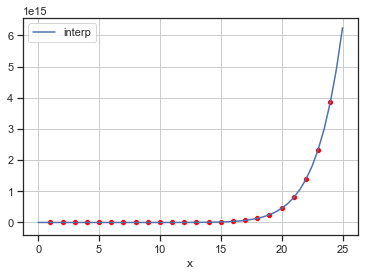

In [133]:
#
# create Horizontal Shift Matrix
#

def poly_shift_matrix(order, h):
    # h -- horizontal shift amount
    
    # n+1 coeficients to solve for -- n+1 x n+1 shift matrix
    n = order + 1
    
    # pascal matrix
    P = pascal(n, kind='upper')
    
    # create H
    H = np.eye(n)
    _h = 1
    for k in range(n):
        for i in range(n-k):            
            H[i,i+k] = _h
        _h *= h

    # create shift matrix - flip for numpy convention
    S = np.flip(H * P)
    
    # return
    return S


# recursion: p(x +h) = p(x) + g(x+h), p(x0) = y0
def interpolate_recursion(g, x0, y0, h=1):
    # g is a numpy polynomial

    # get degree of p, n, from degree of g, n-1
    n = g.order + 1
    

    # get shift matrix
    S = poly_shift_matrix(n, h) 
    
    # Find A = S^-1(S - I), system Ap = q -- solve for p after removing row and column

    I = np.eye(n+1)
    A = np.linalg.inv(S) @ (S - I)

    # remove first row and last column
    A = A[1:,:-1]
    
    p_pad = np.zeros(shape=(n+1,))
    p_pad[:-1] = np.linalg.solve(A,g)
    
    p_raw = np.poly1d(p_pad)

    # solve system for final coefficient
    diff = p_raw(x0) 

    if x0 != 0:
        p_raw += (y0 - diff)/x0

    else:
        p_raw += y0

    return np.poly1d(p_raw)

    
#
# settings
#

g_degree = random.randint(1,30)

x0 = random.randint(0,100)
y0 = power_sum(x0, d=g_degree)

g = np.zeros(shape=(g_degree+1,))
g[0] = 1
g = np.poly1d(g)

# find interpolants
p = interpolate_recursion(g, x0, y0 )

#
# display
#
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn

N = 25

# predicted
x_values = np.linspace(0,N,N*2 + 1) 
y_hat_values = p(x_values)

# true
int_x_values = np.array(list(range(1,N)))
y_values = power_sum(int_x_values, d=g_degree)

df = pd.DataFrame(list(zip(x_values, y_hat_values)), columns=['x', 'interp'])
df = df.set_index('x')

seaborn.set(style='ticks')
fig, ax = plt.subplots()
ax.grid(True)
ax = seaborn.lineplot(data=df, color="coral")
ax = seaborn.scatterplot(x=int_x_values, y=y_values, color="red")
plt.show()


